<h3> Football Drill Suggestion </h3>


<p> 
This program is used to analyze the data of 18,000+ soccer players from European Soccer leagues. The dataset used here is an open European Soccer Database downloaded from Kaggle. </p>

<b> <a href="https://www.kaggle.com/hugomathien/soccer/version/10"> Description of dataset </a> </b> 

<p>
Here, Players are analysed and classified into different types first using ml algorithms. Next, depending on the players type and skill level, drills are suggested
</p>

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
# Getting data from dataset and putting it in a dataframe, it is in the form of a database
conn = sqlite3.connect('database.sqlite')
df = pd.read_sql_query('select * from Player_Attributes',conn)

In [3]:
df.shape

(183978, 42)

In [4]:
# Cleaning dataframe by dropping empty rows
df = df.dropna()
df.shape

(180354, 42)

In [5]:
# Get columns in database
print(50*"_")
print ('\nVarious attributes of a player:')
print(50*"_")
for i in df.columns:
    print (i)

__________________________________________________

Various attributes of a player:
__________________________________________________
id
player_fifa_api_id
player_api_id
date
overall_rating
potential
preferred_foot
attacking_work_rate
defensive_work_rate
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
free_kick_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [6]:
# Getting basic stat details about the database 
print()
print(90*"_")
print('\nStatistical values of the dataframe:')
print(90*"_")
print (df.describe().transpose())


__________________________________________________________________________________________

Statistical values of the dataframe:
__________________________________________________________________________________________
                       count           mean            std     min        25%  \
id                  180354.0   91995.886274   53092.657914     1.0   46074.25   
player_fifa_api_id  180354.0  166822.125803   52821.443279     2.0  156616.00   
player_api_id       180354.0  137653.145514  137599.735284  2625.0   35451.00   
overall_rating      180354.0      68.635317       7.027950    33.0      64.00   
potential           180354.0      73.479457       6.581963    39.0      69.00   
crossing            180354.0      55.142071      17.247231     1.0      45.00   
finishing           180354.0      49.962136      19.041760     1.0      34.00   
heading_accuracy    180354.0      57.263476      16.478716     1.0      49.00   
short_passing       180354.0      62.486726      1

<h1> Correlation Analysis </h1>

<p> Here, <b> overall_rating </b> is defined as the most significant attribute tp identify a player. So the idea used is to perform correlation between all player attributes and player rating to identify which features correlate the most with player rating and use those for the purpose of clustering. The correlation coefficient used in pearson's coefficient </p>

<h3> Peasron's Correlation Coefficien </h3> 

<p> The Pearson's Correlation coefficient ranges from -1 to 1. A correlation of -1 indicates that the attributes are inversely related to each other. A correlation of 0 indicates that no relation exist between the attributes. If correlation is nearer to positive side of 0, then there exists a weak correlation between the attributes, and closer to 1 indicates the presence of strong correlation. A correlation coefficient of 1 indicates perfect correlation between the attributes.

For our analysis, we only consider the attributes which are either weakly or strongly correlated to the overall_rating of the player. Attributes with negative correlation coefficient or correlation coefficient closer to 0 are neglected to focus only on the prime factors which decide the overall_rating of the player. </p>

In [7]:
# Randomizing order of data
# df = df.reindex(np.random.permutation(df.index))

In [8]:
# Following attributes of the players are considered to be either weakly or 
features = ['potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 
            'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
            'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 
            'positioning', 'vision', 'penalties', 'standing_tackle', 'sliding_tackle',
            'gk_diving', 'gk_handling','gk_kicking', 'gk_positioning', 'gk_reflexes']

In [9]:
# computing the correlation of each attribute with overall_rating
correlations = [ df['overall_rating'].corr(df[f]) for f in features ]

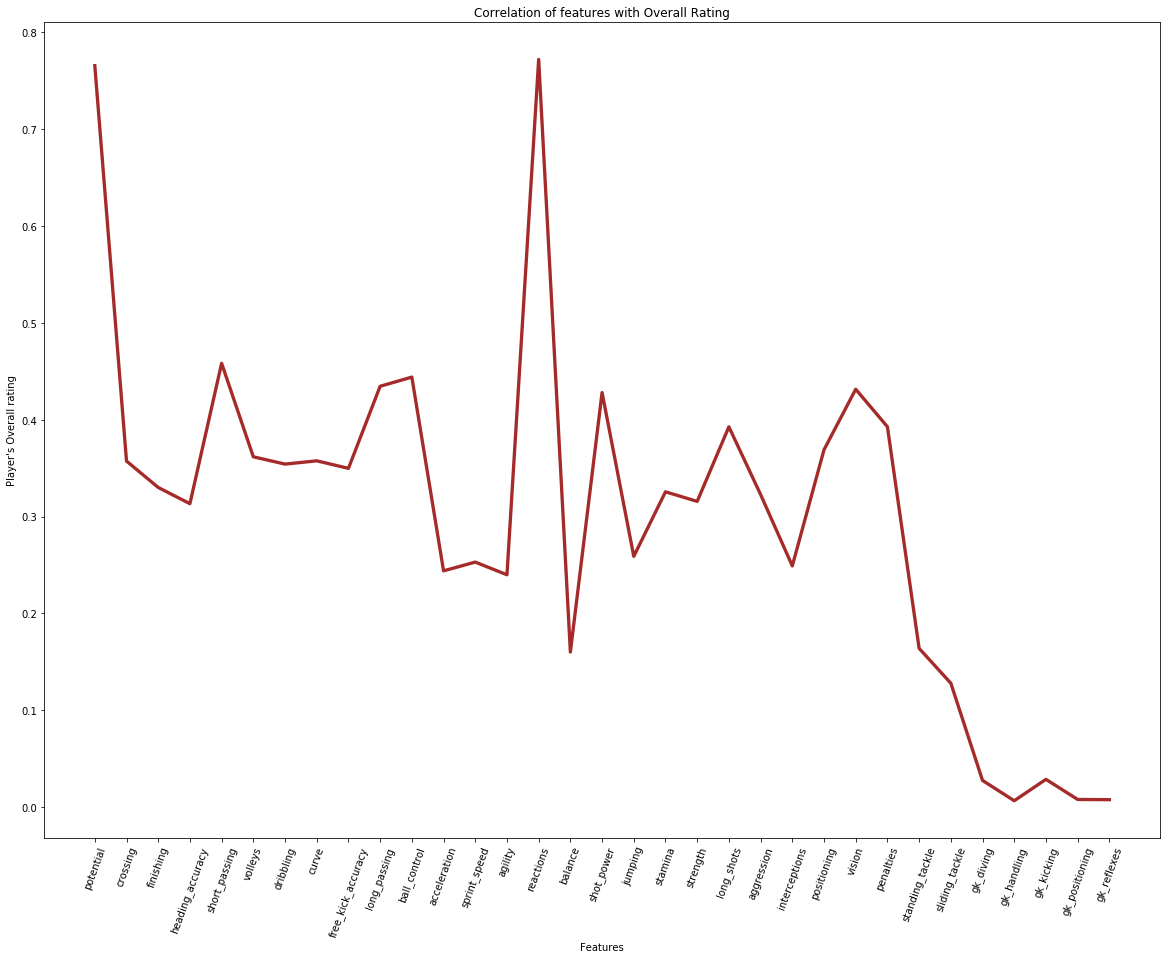

In [10]:
# Drawing pyplot of overall_rating vs all features
def plot_correlation(df,x_label,y_label):
    fig = plt.gcf()
    fig.set_size_inches(20,15)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    ax = df.correlation.plot(linewidth=3.3,color = 'brown')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes,rotation=70)
    plt.title('Correlation of features with Overall Rating')
    plt.show()
    
df2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation(df2,'Features','Player\'s Overall rating')

<h2> Analysis from graph </h2> 

<p> The peaks in the graph show that those attributes are strongly correlated with the overall_rating of the player. Hence, the following attributes should be considered while rating any player: </p> 

<ul>
    <li> potential </li>
    <li> reactions </li>
    <li> shortpassing </li>
    <li> ball control </li>
    <li> vision </li>    
</ul>

<h4> These features can be used for the purpose of clustering </h4> 

<h3> Clustering Players </h3> 

<p> 
In general, a football team typically consists of 11 players. Apart from the goalkeeper, there are 10 other players who are spread across the field according to the team's formation. The 10 players fall into either of the four categories:
</p>

<ul>
    <li>Defenders</li>
    <li>Midfielders</li>
    <li>Wingers</li>
    <li>Centre Forwards</li>
</ul>

In [11]:
# Justification for using features

<p>
    
Players falling into each of this four categories have unique attributes which makes them to standout in their particular category. For instance, the defenders are supposed to have strong interception capablities to intrude into opposition's attack, while midfielders cover the most part of ground which is squarely attributed to their potential. Basically the attackers are further classified into wing attackers and center forwards. As their name suggests wing attackers and center forwards should have good reaction and ball control capablilites to embrace their positions in the team respectively. So, we cluster players based on these five attributes:

</p>

<ol>
    <li> Diving (goal keeper) </li>
    <li> Interceptions </li>
    <li> Potential </li>
    <li> Reaction </li>
    <li> Ball control </li>
</ol>

In [12]:
# Potential features of the players in each group
groupFeatures= ['gk_diving','interceptions', 'potential',  'reactions', 'ball_control']

print(50*"_")
print ("\nCorrelation Analysis of these grouping features:")
print(50*"_")
for f in groupFeatures:
    related = df['overall_rating'].corr(df[f])
    print ("%s : %.2f" % (f,related))

__________________________________________________

Correlation Analysis of these grouping features:
__________________________________________________
gk_diving : 0.03
interceptions : 0.25
potential : 0.77
reactions : 0.77
ball_control : 0.44


In [13]:
#Generating a new dataframe from the features which are defined as group features
df_select = df[groupFeatures].copy(deep=True)

print(90*"_")
print ("\nNew DataFrame :")
print(90*"_")
print (df_select)

#Perform scaling on the dataframe containing the features
groups = scale(df_select)

__________________________________________________________________________________________

New DataFrame :
__________________________________________________________________________________________
        gk_diving  interceptions  potential  reactions  ball_control
0             6.0           70.0       71.0       47.0          49.0
1             6.0           70.0       71.0       47.0          49.0
2             6.0           41.0       66.0       47.0          49.0
3             5.0           40.0       65.0       46.0          48.0
4             5.0           40.0       65.0       46.0          48.0
5            14.0           67.0       76.0       67.0          71.0
6            14.0           67.0       76.0       67.0          71.0
7            14.0           66.0       75.0       67.0          70.0
8            14.0           66.0       75.0       67.0          70.0
9            14.0           66.0       75.0       67.0          70.0
10           14.0           66.0       77.

In [14]:
# Using k-means clustering to group into 5 sets of players

In [15]:
# Define number of clusters#Define n 
clusters = 5

In [16]:
# Train a model using KMeans() machine learning method
model = KMeans(init='k-means++',n_clusters=clusters,n_init=20).fit(groups)

In [17]:
# Counting the number of players in each cluster
print(60*"_")
print("\nCount of players in each cluster : ")
print(60*"_")
pd.value_counts(model.labels_,sort=False)

____________________________________________________________

Count of players in each cluster : 
____________________________________________________________


0    33435
1    39309
2    14544
3    54623
4    38443
dtype: int64

In [18]:
# Create a compostite dataframe for plotting the newly formed dataframe#Create a 
# Using custom function from customplot module which we import at the beginning of the program
df3 = model.cluster_centers_

print(90*"_")
print ("\nComposite DataFrame :")
print(90*"_")
print("\ngk_diving  Interceptions  potential  reactions  ball_control  prediction\n")
for i in range(5) :
    print(df3[i], "   ", i)

__________________________________________________________________________________________

Composite DataFrame :
__________________________________________________________________________________________

gk_diving  Interceptions  potential  reactions  ball_control  prediction

[-0.29232145 -0.39854725 -1.10383475 -1.22835677 -0.42317134]     0
[-0.27868693 -1.01279765  0.42035874  0.36152761  0.62511831]     1
[ 3.28098983 -1.30153861 -0.13506048 -0.35331841 -2.58978062]     2
[-0.28874488  0.63301001 -0.30962016 -0.09432934  0.00084903]     3
[-0.29162227  0.97333961  1.0187149   0.96367917  0.70594305]     4


In [19]:
# For plotting graph inside notebook we use matplotlib inline
%matplotlib inline

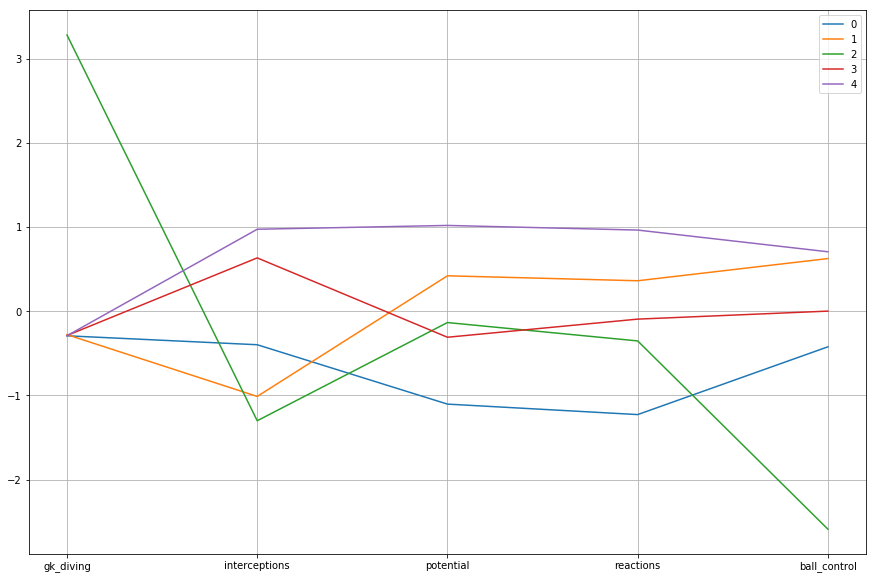

In [20]:
# Plotting the five groups of players in the same graph to analyse what features they share in common with each other
fig = plt.gcf()
fig.set_size_inches(15,10)
for i in range(5) :
    plt.plot(df3[i], label=str(i)) 
plt.legend(loc='upper right')
x=[0.0,1.0,2.0,3.0,4.0]
plt.xticks( x, groupFeatures)
plt.grid()
plt.show()

<h2> Analysis from this graph </h2>

<p>
    <ul> 
        <li> Two groups (*red and black*) are similar to each other except for interceptions capablities- these groups can coach each other in interceptions and where they differ </li>
        <li> Two groups (*green and yellow*) seem to be equally talented in potential and reactions. These groups can coach each other in ball control, interceptions and gk_diving. </li>
    </ul>
</p>

In [21]:
l = -1
for x in pd.value_counts(model.labels_,sort=False) :
    l = l+1
    if x > 38000 and x < 39000 :
        break

In [22]:
labels = model.labels_

In [23]:
newDf = df

In [24]:
newDf['class'] = labels

In [25]:
newDf.shape

(180354, 43)

In [26]:
dictDf = {k: v for k, v in df.groupby('class')}

In [27]:
# Write to excel to avoid order mismatch later
gkDf = pd.read_csv('GoalKeeper.csv')
defDf = pd.read_csv('Defender.csv')
midDf = pd.read_csv('Midfielder.csv')
forDf = pd.read_csv('Winger.csv')
wingDf = pd.read_csv('Striker.csv')

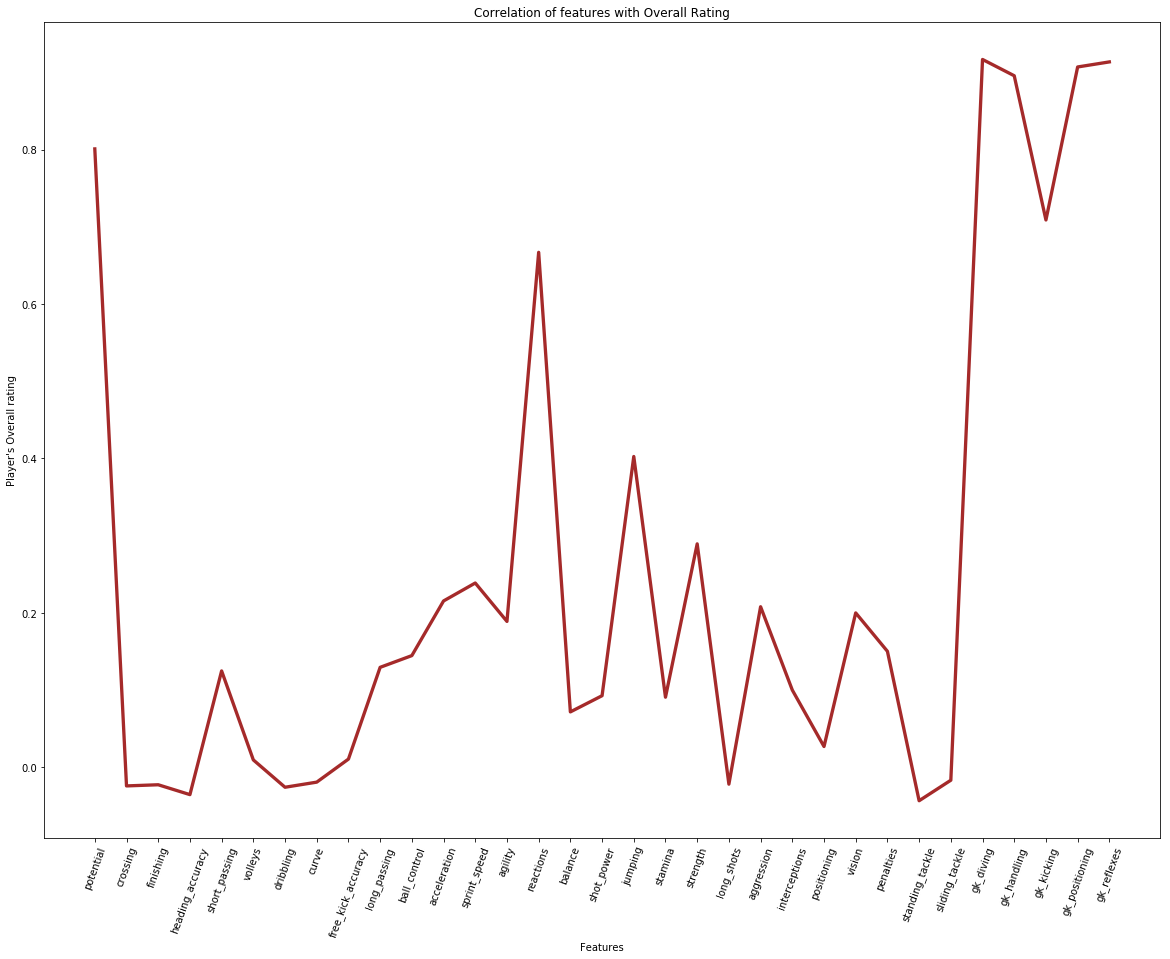

In [28]:
# Goalkeeper
correlations = [gkDf['overall_rating'].corr(gkDf[f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

<h3> Analysis from graph </h3> 

<p> Goalkeeper attributes like gk_diving, gk_handling, gk_kicking, gk_positioning and gk_reflexes correlate closesly with the rating of player   </p>

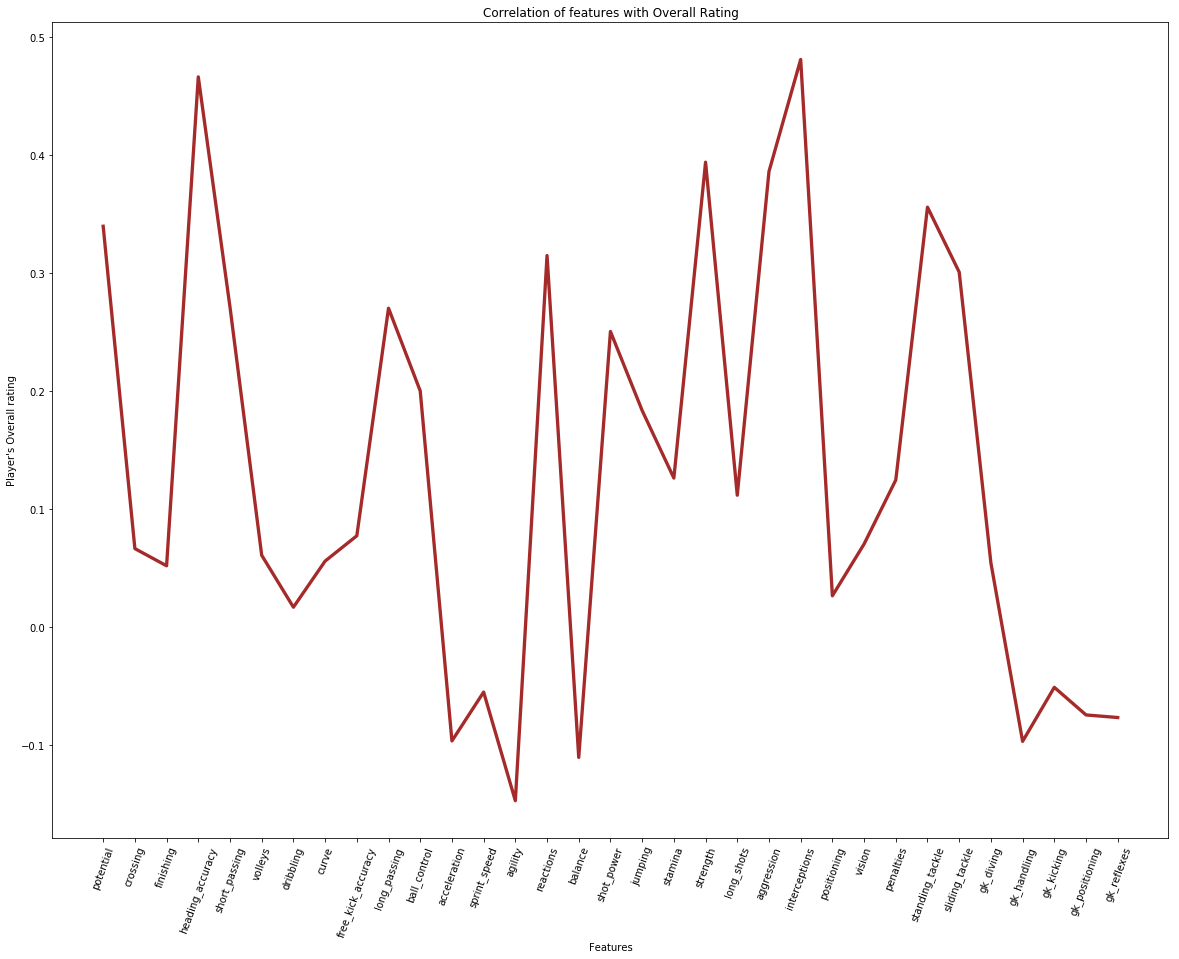

In [29]:
# Defender
correlations = [defDf['overall_rating'].corr(defDf[f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

<h2> Analysis from graph </h2> 
<p> Defender attributed like standing tackle, sliding tackle, interceptions, strength, reaction, long passing, jumping and heading accuracy </p>

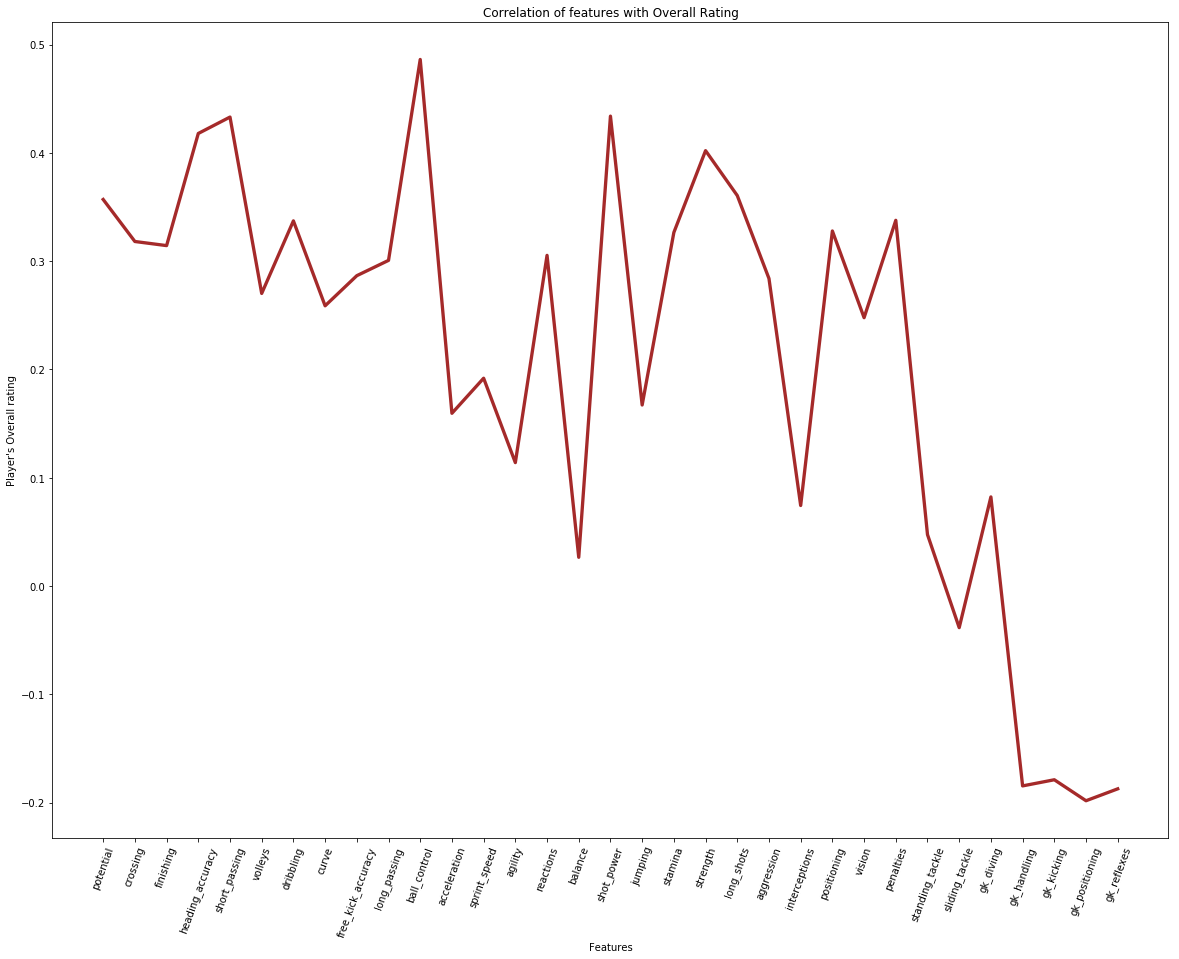

In [30]:
# Midfielder
correlations = [midDf['overall_rating'].corr(midDf[f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

<h3> Analysis from graph </h3> 

<p>
    It can be observed that class 3 corresponds to midfielders as attributes like potential,short_passing,long_passing, reactions, shot_power, aggression, ball control
</p>

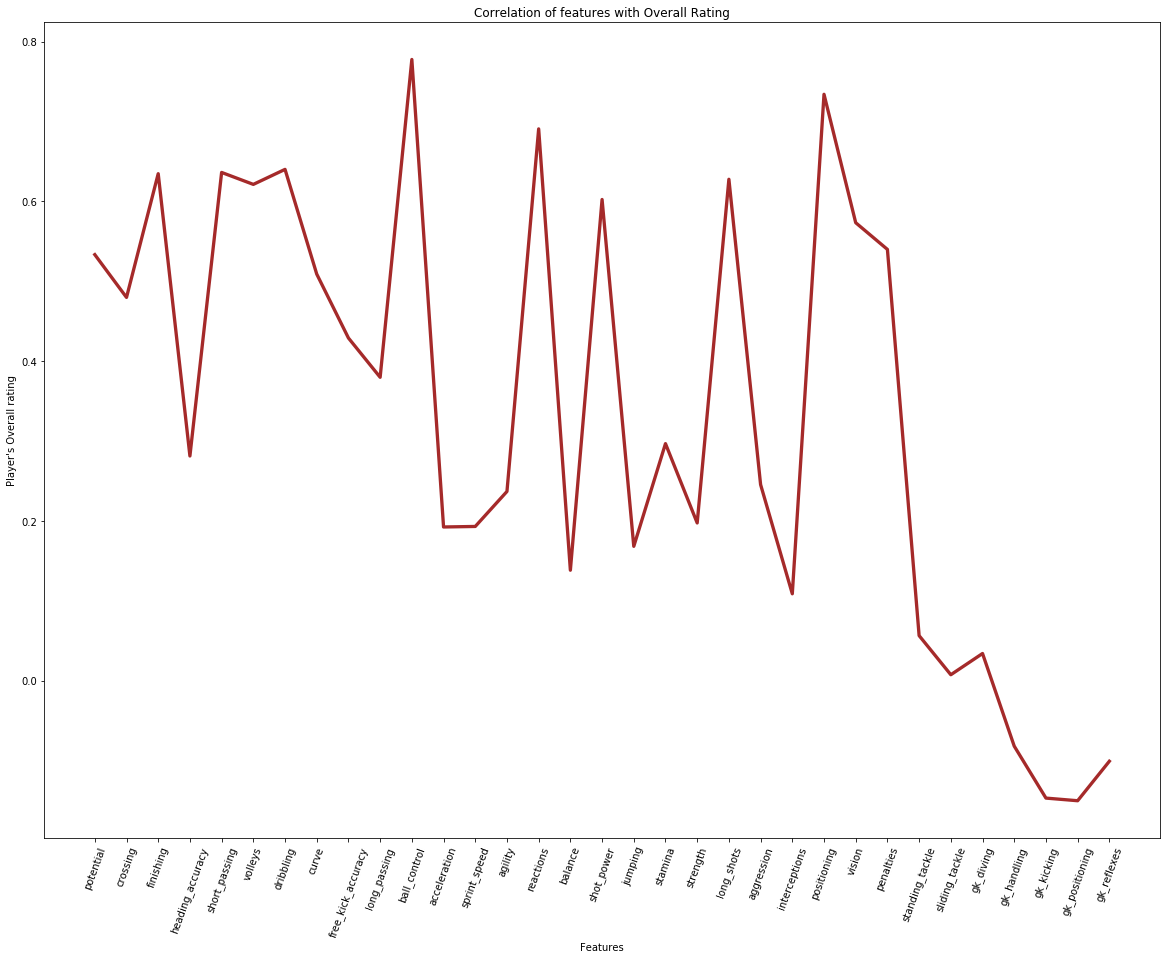

In [31]:
# Winger
correlations = [wingDf['overall_rating'].corr(wingDf[f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

<h3> Analysis from graph </h3> 

<p>Winger attributes like shot, curve, ball control, agility, reactions, vision and crossing   </p>

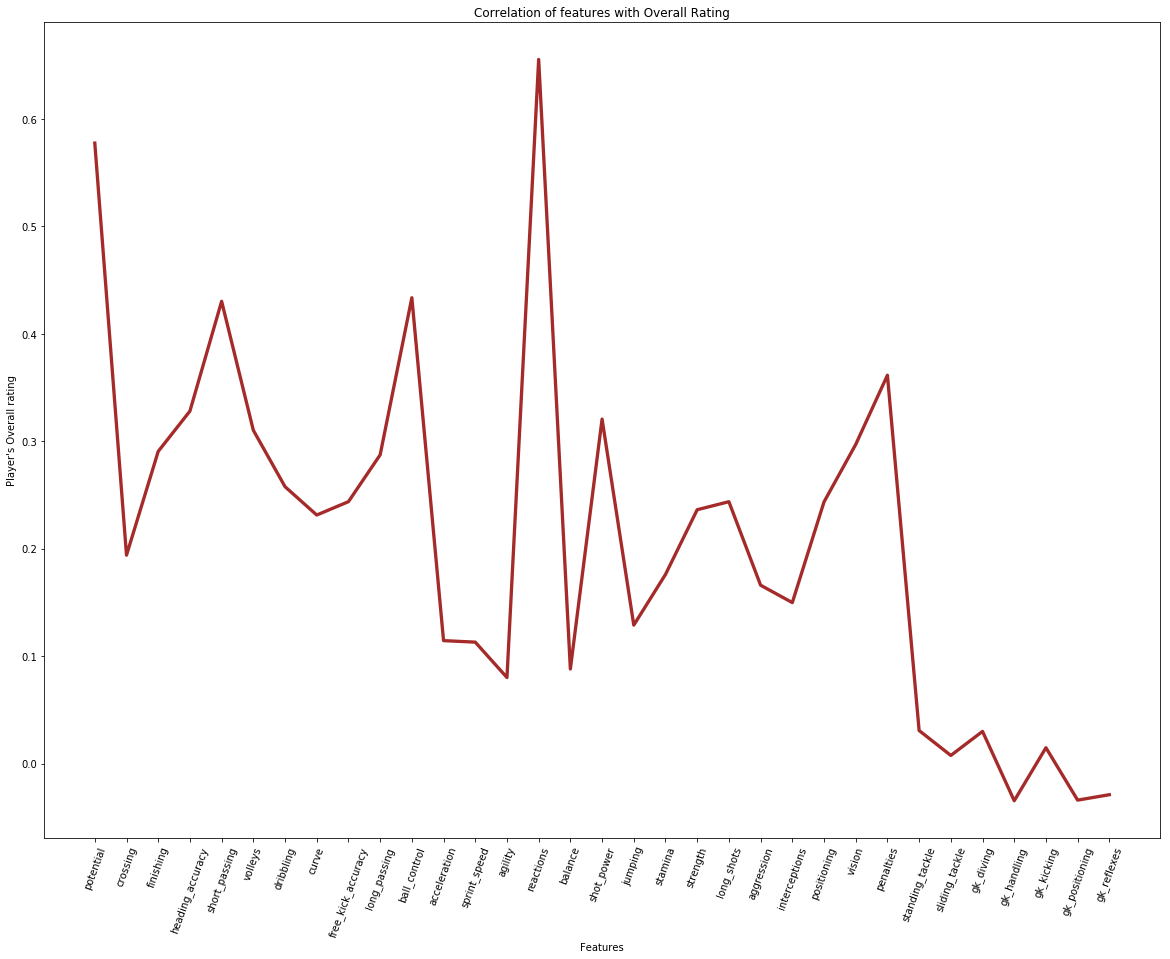

In [32]:
# Striker
correlations = [forDf['overall_rating'].corr(forDf[f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

<h3> Analysis from graph </h3> 

<p> Striker attributes like finishing, positioning, shot power, ball control  </p>

In [33]:
# Now classifying defenders as full backs and centre backs

<p> A fullback and a centre back differs in terms of speed, stamina, heading capabilities and tackling capabilities. So we will be able to distiguish between them if the following attributes are taken </p> 

<ol>
    <li> strength </li>
    <li> sprint speed </li>
    <li> jumping </li>
    <li> heading accuracy </li>
    <li> standing tackle </li>
    <li> sliding tackle </li>
</ol>

In [34]:
defFeatures = [ "strength", "sprint_speed", "jumping", "heading_accuracy", "standing_tackle", "sliding_tackle"]
defDf_select = defDf[defFeatures].copy(deep=True)

print(90*"_")
print ("\nNew DataFrame :")
print(90*"_")
print (defDf_select)

#Perform scaling on the dataframe containing the features
defs = scale(defDf_select)

__________________________________________________________________________________________

New DataFrame :
__________________________________________________________________________________________
       strength  sprint_speed  jumping  heading_accuracy  standing_tackle  \
0          56.0          78.0     85.0              58.0             75.0   
1          56.0          78.0     85.0              58.0             75.0   
2          56.0          78.0     84.0              57.0             75.0   
3          56.0          78.0     84.0              57.0             75.0   
4          56.0          78.0     84.0              57.0             75.0   
5          56.0          78.0     84.0              57.0             75.0   
6          56.0          78.0     84.0              57.0             75.0   
7          50.0          82.0     84.0              56.0             72.0   
8          50.0          82.0     84.0              51.0             72.0   
9          56.0          72.0  

In [35]:
defModel = KMeans(init='k-means++',n_clusters=2,n_init=20).fit(defs)

In [36]:
labels = defModel.labels_

In [37]:
newDefDF = defDf
newDefDF['class'] = labels

In [38]:
defDictDf = {k: v for k, v in newDefDF.groupby('class')}

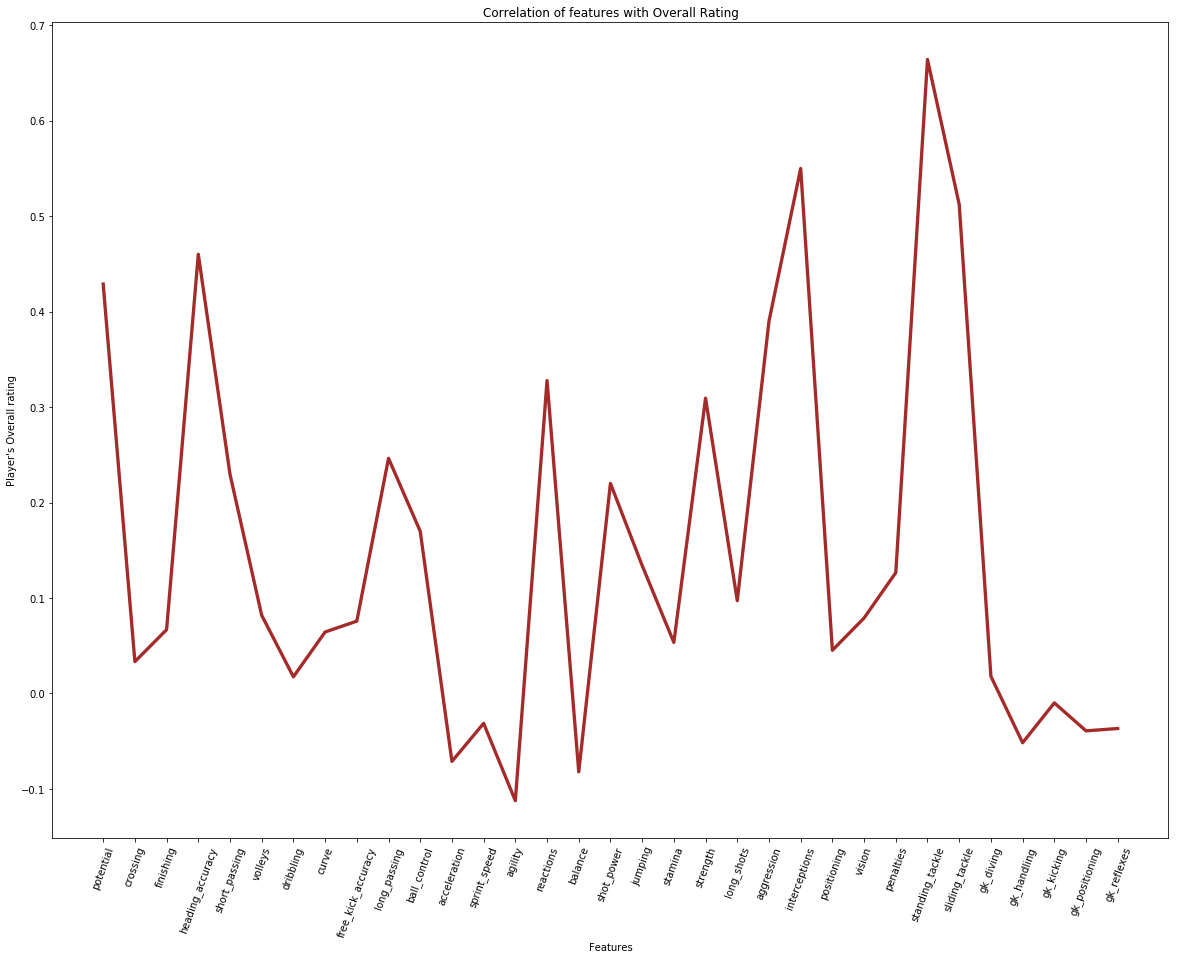

In [39]:
# CBlabels = defModel.labels_
correlations = [defDictDf[1]['overall_rating'].corr(defDictDf[1][f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

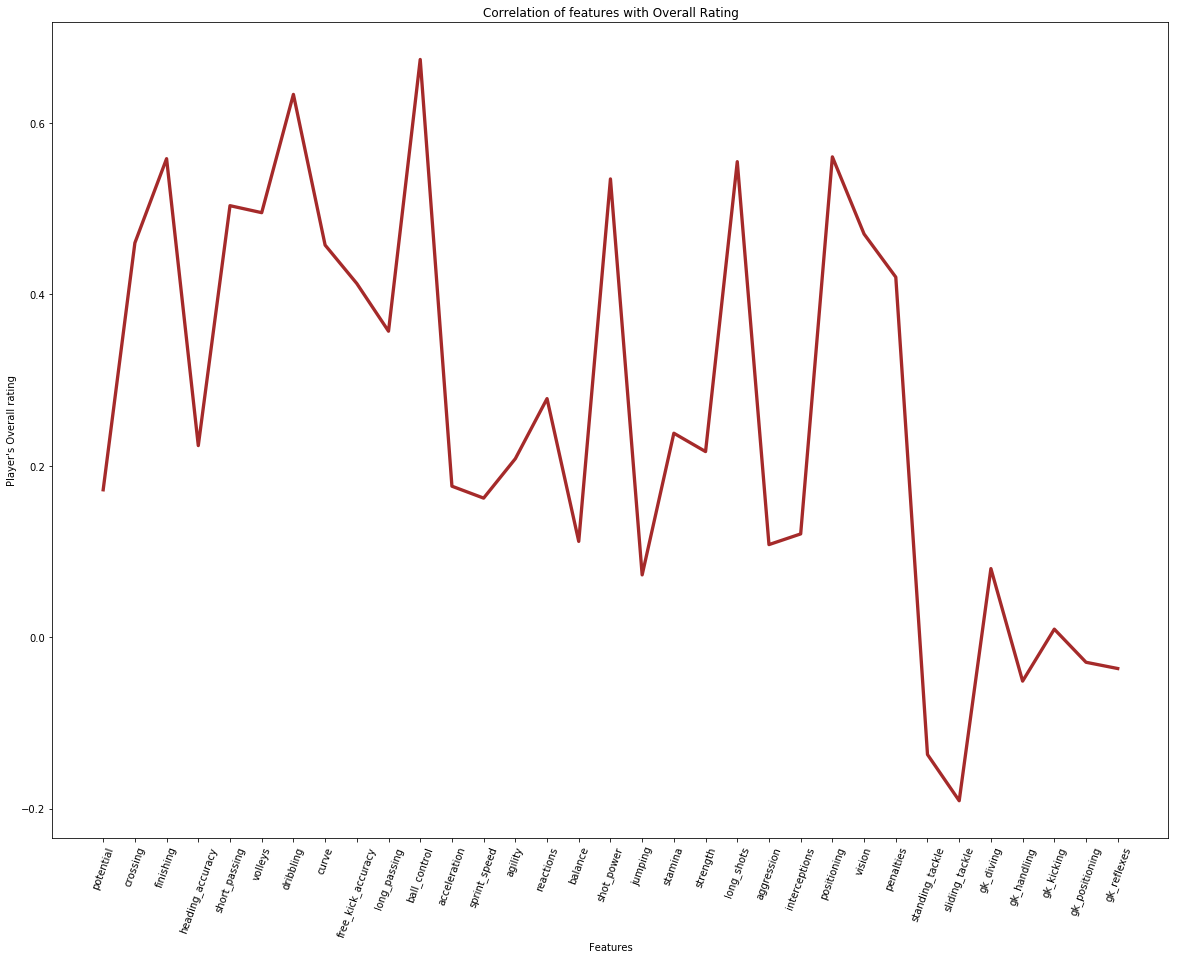

In [40]:
# FB
correlations = [defDictDf[0]['overall_rating'].corr(defDictDf[0][f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

In [41]:
# Classifying midfielders as DMs and CMs
def s(x,y) :
    return y,x

<p> A Dm and Cm vary in defensive and attacking capabilities.
    
<ol>
   A dm is a defensive midfielder his main focus is on defending. attributes like standing_tackle, sliding_tackle adn interceptions
   A cm is the one who dictates play. His main focus is on using his vision to make proper passes
</ol>

In [42]:
midFeatures = [ "interceptions", "standing_tackle", "sliding_tackle", "vision", "short_passing", "long_passing"]
midDf_select = midDf[midFeatures].copy(deep=True)

print(90*"_")
print ("\nNew DataFrame :")
print(90*"_")
print (midDf_select)

#Perform scaling on the dataframe containing the features
mids = scale(midDf_select)

__________________________________________________________________________________________

New DataFrame :
__________________________________________________________________________________________
       interceptions  standing_tackle  sliding_tackle  vision  short_passing  \
0               70.0             69.0            69.0    54.0           61.0   
1               70.0             69.0            69.0    54.0           61.0   
2               41.0             66.0            69.0    54.0           61.0   
3               40.0             63.0            66.0    53.0           60.0   
4               40.0             63.0            66.0    53.0           60.0   
5               40.0             60.0            63.0    38.0           45.0   
6               31.0             59.0            63.0    38.0           44.0   
7               32.0             60.0            63.0    38.0           45.0   
8               32.0             45.0            63.0    38.0           39.0   
9

In [43]:
midModel = KMeans(init='k-means++',n_clusters=2,n_init=20).fit(mids)

In [44]:
labels = midModel.labels_
newMidDF = midDf
newMidDF['class'] = labels

In [45]:
midDictDf = {k: v for k, v in newMidDF.groupby('class')}

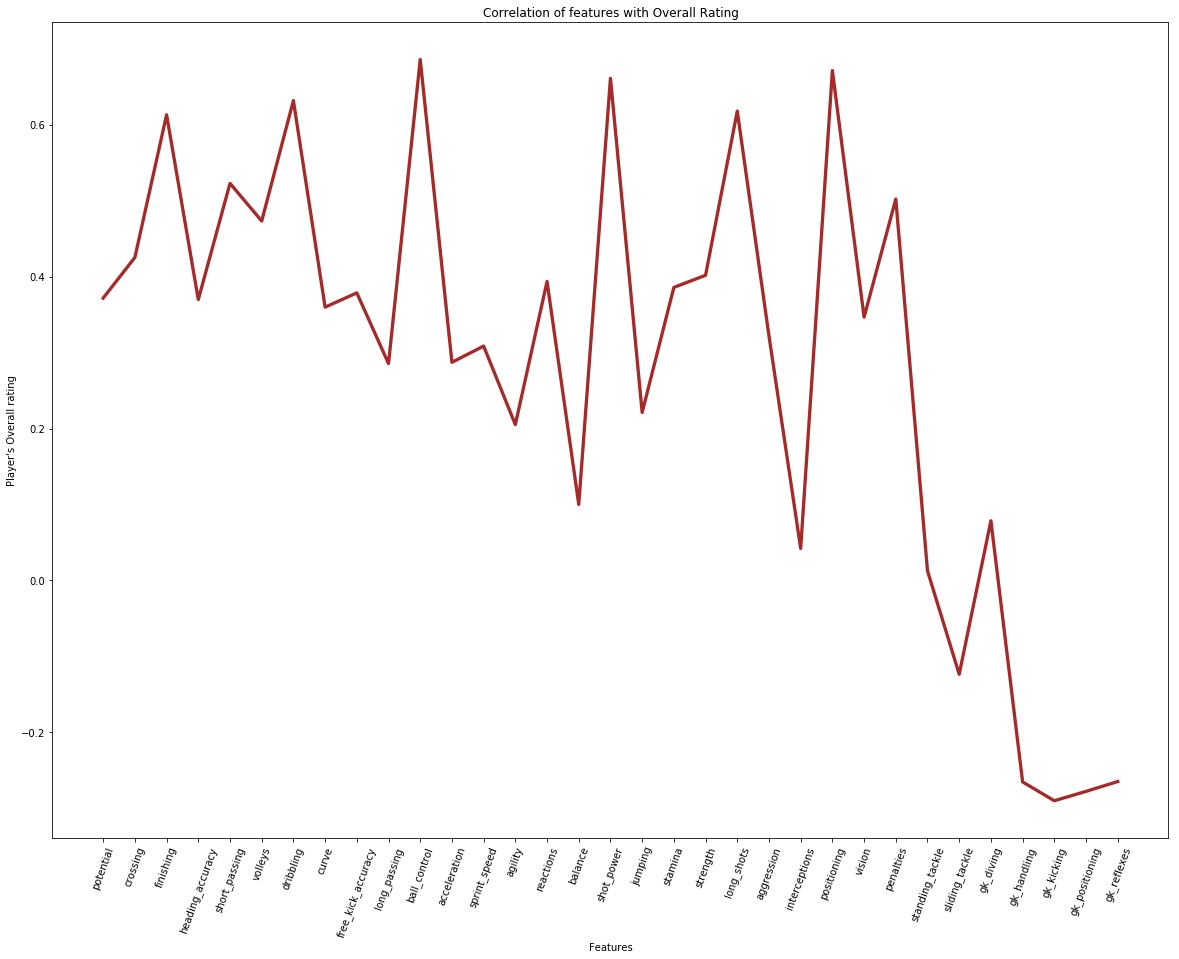

In [46]:
# CDM
correlations = [midDictDf[1]['overall_rating'].corr(midDictDf[1][f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

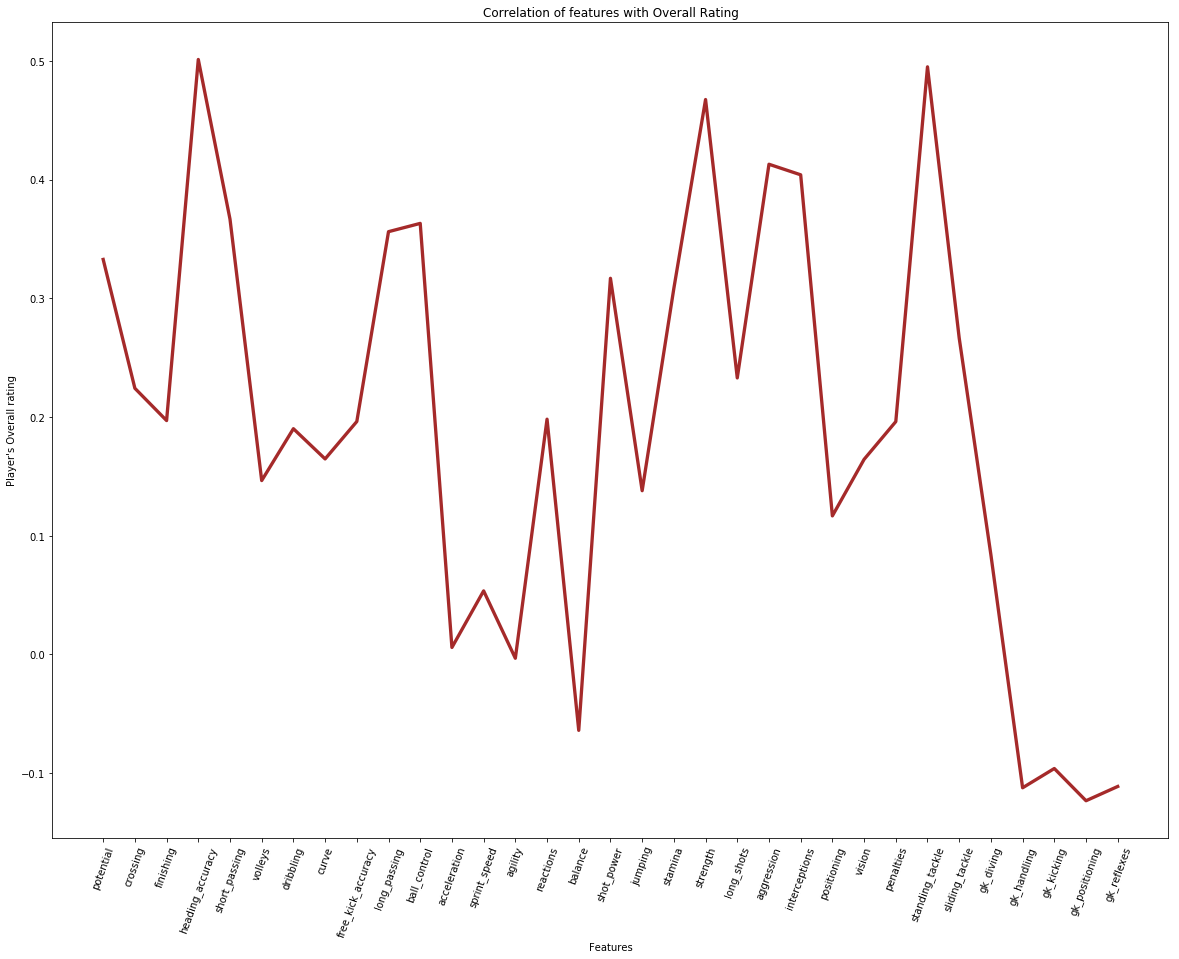

In [47]:
# CM
correlations = [midDictDf[0]['overall_rating'].corr(midDictDf[0][f]) for f in features ]
defDf2 = pd.DataFrame({'attributes' : features, 'correlation' : correlations })
plot_correlation( defDf2,'Features','Player\'s Overall rating')

In [48]:
clgDf = pd.read_csv("College.csv")
clgDf2 = clgDf.values

In [49]:
i = 0
j = [1,3,2,2,3]
from scipy.spatial import distance
k = 0
pred = []
print("Sno.  C1  C2  C3  C4  C5")
for xi in clgDf2 :
    d = []
    for y in df3 :
        d.append(distance.euclidean(xi,y))
    d[i], d[l] = s(d[i],d[l])
    print(k, d, "lowest : ", d.index(min(d)))
    pred.append(d.index(min(d)))
    j[i] = j[i]-1
    if j[i] == 0 :
        i = i+1
    k = k+1

Sno.  C1  C2  C3  C4  C5
0 [118.96765691530089, 120.74353558339766, 122.70020979260975, 120.64485978196417, 122.32389796486973] lowest :  0
1 [143.12576963033538, 139.7186361291771, 143.3709444272298, 141.46002398747513, 141.30377524646227] lowest :  1
2 [142.536607057641, 139.1014894644005, 142.73823717212355, 140.85370923535592, 140.6907002476898] lowest :  1
3 [142.536607057641, 139.1014894644005, 142.73823717212355, 140.85370923535592, 140.6907002476898] lowest :  1
4 [95.48341577171995, 93.6894116629817, 92.63116977677362, 94.15556891227527, 93.25694751055693] lowest :  2
5 [96.08480814853353, 94.28608137092365, 93.22819414972619, 94.75700711566266, 93.862284118549] lowest :  2
6 [129.34107023659342, 127.38256989633663, 129.60636590517598, 126.04323725768909, 127.80196784720076] lowest :  3
7 [129.34107023659342, 127.38256989633663, 129.60636590517598, 126.04323725768909, 127.80196784720076] lowest :  3
8 [142.99725182833714, 141.19211625482686, 143.27759804828636, 141.33093146162

In [50]:
drills = []
drills.append(["1v1 Diamond shooting drill", "Shooting angle drill", "Goalkeeper side to side"])
drills.append(["1v1 defending", "Break the play"])
drills.append(["Central midfield passing combination", "four corner passing", "3v3v3"])
drills.append(["Cross under pressure", "Shooting agility drill", "Attacking endline crossing game"])
drills.append(["Finish under pressure", "Shooting and finishing game", "Shooting agility drill"])
drills

[['1v1 Diamond shooting drill',
  'Shooting angle drill',
  'Goalkeeper side to side'],
 ['1v1 defending', 'Break the play'],
 ['Central midfield passing combination', 'four corner passing', '3v3v3'],
 ['Cross under pressure',
  'Shooting agility drill',
  'Attacking endline crossing game'],
 ['Finish under pressure',
  'Shooting and finishing game',
  'Shooting agility drill']]

In [51]:
def playerType(i) :
    if i == 0 :
        return "GoalKeeper"
    elif i == 1 :
        return "Defender"
    elif i == 2 :
        return "Midfielder"
    elif i == 3 :
        return "Winger"
    else :
        return "Striker"

In [52]:
for i in range(len(pred)):
    print("Drills for ", i+1, "\nClassifeid as : ", playerType(pred[i]), "\nDrills : ", drills[pred[i]], "\n\n")

Drills for  1 
Classifeid as :  GoalKeeper 
Drills :  ['1v1 Diamond shooting drill', 'Shooting angle drill', 'Goalkeeper side to side'] 


Drills for  2 
Classifeid as :  Defender 
Drills :  ['1v1 defending', 'Break the play'] 


Drills for  3 
Classifeid as :  Defender 
Drills :  ['1v1 defending', 'Break the play'] 


Drills for  4 
Classifeid as :  Defender 
Drills :  ['1v1 defending', 'Break the play'] 


Drills for  5 
Classifeid as :  Midfielder 
Drills :  ['Central midfield passing combination', 'four corner passing', '3v3v3'] 


Drills for  6 
Classifeid as :  Midfielder 
Drills :  ['Central midfield passing combination', 'four corner passing', '3v3v3'] 


Drills for  7 
Classifeid as :  Winger 
Drills :  ['Cross under pressure', 'Shooting agility drill', 'Attacking endline crossing game'] 


Drills for  8 
Classifeid as :  Winger 
Drills :  ['Cross under pressure', 'Shooting agility drill', 'Attacking endline crossing game'] 


Drills for  9 
Classifeid as :  Striker 
Drills : 